#**Executive Summary (BLUF)** 
Using two regressors (the RandomForestRegressor and XGBRegressor), we find that Lagging_Current_Reactive.Power_kVarh is a significant driver of energy consumption Usage_kWh. CO2(tCO2) and Lagging_Current_Power_Factor are also important features to greater model performance.

#**Steel Industry Energy Consumption**
The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

Source : https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset

#**Business Problem**
A random forest regressor has been developed to predict the target variable **Usage_kWh** - Industry Energy Consumption Continuous kWh. A task force wants an explanation of how the regressor works (overall), and an explanation of how/why the prediction of the 10th instance, in particular, is produced by the regressor. Your explanation should be presented in everyday business language as the ML literacy of the task force is limited.

#**Data Dictionary** 
- Date - Time that information is stored on the Korea Electric Power Corporation website 
- Usage_kWh - Industry Energy Consumption Continuous kWh
- Lagging Current reactive power Continuous kVarh  
- Leading Current reactive power Continuous kVarh  
- CO2(tCO2) - Carbon dioxide 
- Lagging Current power factor Continuous % 
- Leading Current Power factor Continuous % 
- NSM - Number of Seconds from midnight  
- Week status Categorical - Weekend (0) and Weekday(1)
- Day of week Categorical - Monday to Sunday
- Load Type Categorical - Light Load, Medium Load, Maximum Load

#**Instruction**

Download the dataset from https://drive.google.com/file/d/1y9KpjDlZIm-8_FKOjuI7Mxfu7JkBX2HX/view?usp=sharing

Using the data, and code from the M6 explainability Python notebooks, and other resources, as appropriate:

· Explain the black-box model(s), and determine if the explanation(s) fit(s) needs of the business problem.

· Summarize your findings and an action items in a few sentences at the end of the notebook (in a section titled “Conclusion”). Be sure to offer the Bottom Line Up Front (BLUF) at the start of the Conclusion.

· Submit your notebook file on Blackboard, double checking that you have submitted the correct file.

In [ ]:
# Basic libraries
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import unique
from numpy import where
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import pyplot
import scipy.stats as ss
import math

In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# Keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz

In [ ]:
from xgboost import XGBRegressor

In [ ]:
!git clone --recursive https://github.com/dmlc/xgboost

Cloning into 'xgboost'...
remote: Enumerating objects: 50720, done.
remote: Counting objects: 100% (1586/1586), done.
remote: Compressing objects: 100% (786/786), done.
remote: Total 50720 (delta 884), reused 1265 (delta 706), pack-reused 49134
Receiving objects: 100% (50720/50720), 22.57 MiB | 12.10 MiB/s, done.
Resolving deltas: 100% (31258/31258), done.
Submodule 'cub' (https://github.com/NVlabs/cub) registered for path 'cub'
Submodule 'dmlc-core' (https://github.com/dmlc/dmlc-core) registered for path 'dmlc-core'
Submodule 'gputreeshap' (https://github.com/rapidsai/gputreeshap.git) registered for path 'gputreeshap'
Cloning into '/content/xgboost/cub'...
remote: Enumerating objects: 35517, done.        
remote: Counting objects: 100% (266/266), done.        
remote: Compressing objects: 100% (188/188), done.        
remote: Total 35517 (delta 157), reused 133 (delta 78), pack-reused 35251        
Receiving objects: 100% (35517/35517), 17.93 MiB | 16.49 MiB/s, done.
Resolving deltas:

In [ ]:
!pip install shap==0.40.0
import shap

     |████████████████████████████████| 564 kB 4.5 MB/s 


In [ ]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

     |████████████████████████████████| 34.0 MB 147 kB/s 
     |████████████████████████████████| 13.1 MB 14.5 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=cc58b3cf1a897abe9de865dc25f3629ea63ce49eebbad223b8f3398dda41dd42
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install lime
import lime
import lime.lime_tabular

     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=38e322a5f580d59cf91d3ebbf2c0c96f469f8dcc0b1da3317df544ac663801cf
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
# Update openpyxl
!pip install openpyxl==3.0.5

     |████████████████████████████████| 242 kB 5.5 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


#**Read Data**

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read 
file_ = "/content/drive/MyDrive/hackathon/Steel_industry_data.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_, nrows=500) # read in csv file

#**EDA**

In [ ]:
# print first 5 rows of dataframe 
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
# Shape of df
print("Shape", df.shape)

# Check data types
print(df.info())

Shape (500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  500 non-null    object 
 1   Usage_kWh                             500 non-null    float64
 2   Lagging_Current_Reactive.Power_kVarh  500 non-null    float64
 3   Leading_Current_Reactive_Power_kVarh  500 non-null    float64
 4   CO2(tCO2)                             500 non-null    float64
 5   Lagging_Current_Power_Factor          500 non-null    float64
 6   Leading_Current_Power_Factor          500 non-null    float64
 7   NSM                                   500 non-null    int64  
 8   WeekStatus                            500 non-null    object 
 9   Day_of_week                           500 non-null    object 
 10  Load_Type                             500 non-null    object 
dtypes: 

In [ ]:
# Describe Dataset 
print("\n DESCRIBE\n",df.describe())


 DESCRIBE
         Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  500.000000                            500.000000   
mean    35.216060                             14.315440   
std     44.808769                             18.699962   
min      3.170000                              0.000000   
25%      4.140000                              3.530000   
50%      4.680000                              4.750000   
75%     65.132500                             21.660000   
max    147.460000                             78.480000   

       Leading_Current_Reactive_Power_kVarh   CO2(tCO2)  \
count                            500.000000  500.000000   
mean                               3.982680    0.011480   
std                                8.240695    0.019915   
min                                0.000000    0.000000   
25%                                0.000000    0.000000   
50%                                0.000000    0.000000   
75%                                0.477500

In [ ]:
# Check Skewness
print("\n SKEWNESS\n",df.skew())


 SKEWNESS
 Usage_kWh                               1.133940
Lagging_Current_Reactive.Power_kVarh    1.476547
Leading_Current_Reactive_Power_kVarh    1.811437
CO2(tCO2)                               1.483556
Lagging_Current_Power_Factor           -0.238482
Leading_Current_Power_Factor           -1.700052
NSM                                     0.060493
dtype: float64


In [ ]:
# Check kurtosis
print("\n kurtosis\n",df.kurtosis())


 kurtosis
 Usage_kWh                              -0.199112
Lagging_Current_Reactive.Power_kVarh    0.992446
Leading_Current_Reactive_Power_kVarh    1.606698
CO2(tCO2)                               0.747900
Lagging_Current_Power_Factor           -1.638292
Leading_Current_Power_Factor            0.990531
NSM                                    -1.238966
dtype: float64


CORRELATION MATRIX
                                       Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive.Power_kVarh   0.940597   
Leading_Current_Reactive_Power_kVarh  -0.299447   
CO2(tCO2)                              0.832234   
Lagging_Current_Power_Factor           0.450688   
Leading_Current_Power_Factor           0.317739   
NSM                                    0.253766   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.940597   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.357977   
CO2(tCO2)                                                         0.764240   
Lagging_Current_Power_Factor                                      0.259936   
Leading_Current_Power_Factor                                      0.359731   
NSM                      

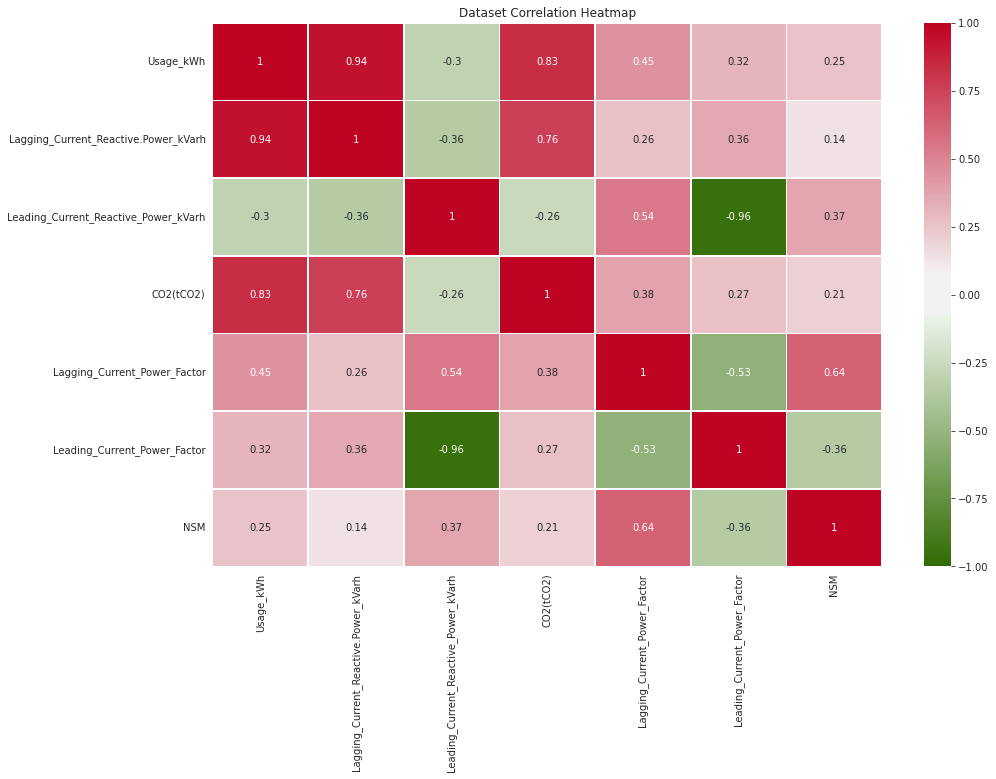



COVARIANCE MATRIX
                                           Usage_kWh  \
Usage_kWh                               2007.825752   
Lagging_Current_Reactive.Power_kVarh     788.147556   
Leading_Current_Reactive_Power_kVarh    -110.572417   
CO2(tCO2)                                  0.742654   
Lagging_Current_Power_Factor             285.679239   
Leading_Current_Power_Factor             414.579220   
NSM                                   288130.399719   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                       788.147556   
Lagging_Current_Reactive.Power_kVarh                            349.688584   
Leading_Current_Reactive_Power_kVarh                            -55.164555   
CO2(tCO2)                                                         0.284609   
Lagging_Current_Power_Factor                                     68.761841   
Leading_Current_Power_Factor                                    195.88

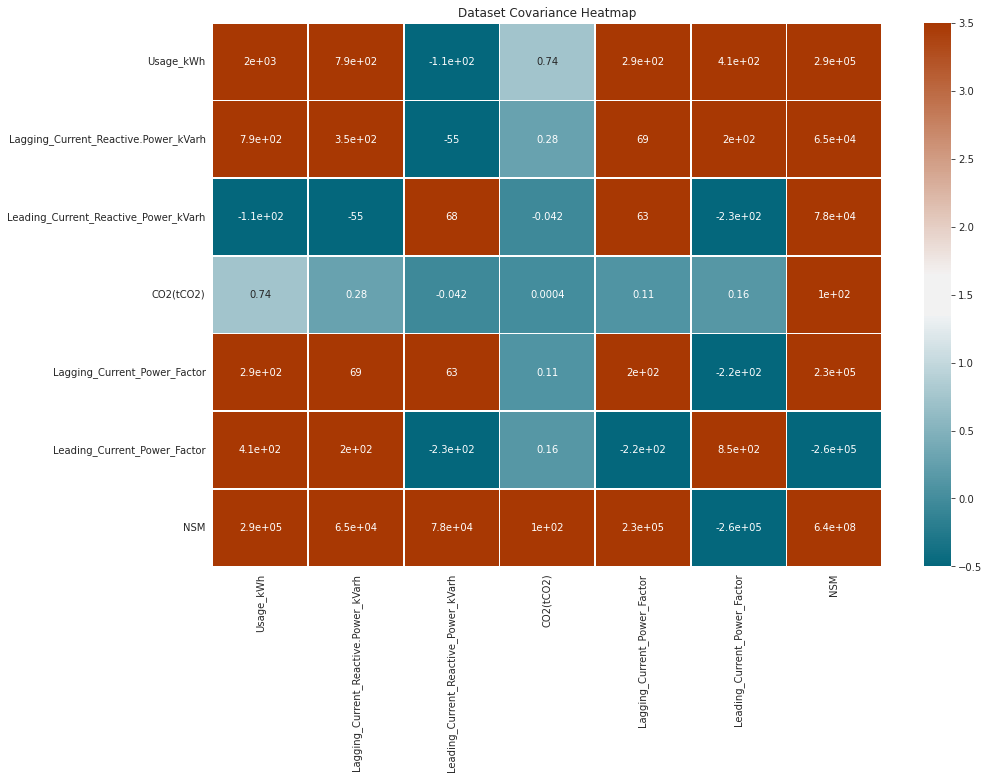

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap

sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Dataset Covariance Heatmap")
plt.show()

In [ ]:
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 0


In [ ]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


#**Encoding**

In [ ]:
# create dummy variables for categorical variable
df = pd.get_dummies(data=df, columns=['WeekStatus','Day_of_week','Load_Type'])

In [ ]:
# Drop date column
df =df.drop(['date'], axis=1)

# **Pre-processing -Skewness correction**

In [ ]:
# pick numerical variables and set them as X

X = df[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']]

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution 

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()
                

    return DF


 ------------------------------------------------------

 'Lagging_Current_Reactive.Power_kVarh' had 'positive' skewness of 1.48

 Transformation yielded skewness of -0.21


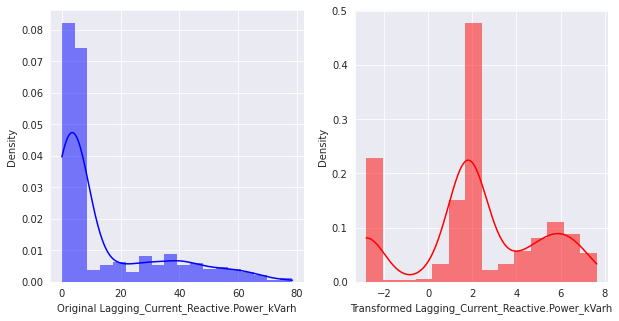


 ------------------------------------------------------

 'Leading_Current_Reactive_Power_kVarh' had 'positive' skewness of 1.81

 Transformation yielded skewness of 1.03


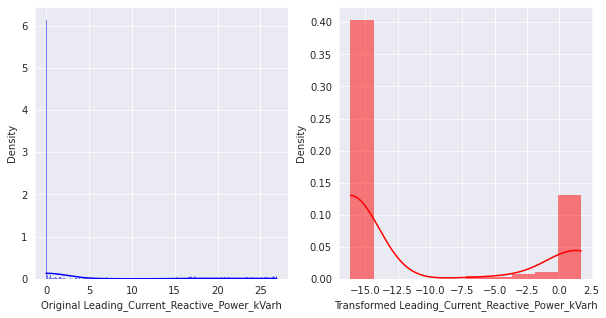


 ------------------------------------------------------

 'CO2(tCO2)' had 'positive' skewness of 1.48

 Transformation yielded skewness of 0.94


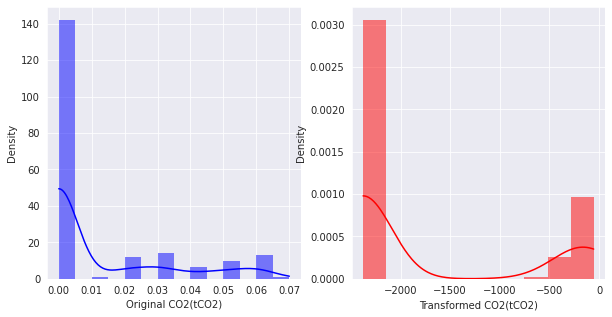


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Lagging_Current_Power_Factor' . Skewness = -0.24


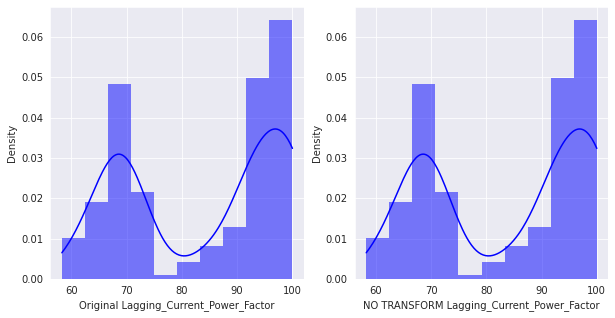


 ------------------------------------------------------

 'Leading_Current_Power_Factor' had 'negative' skewness of -1.70

 Transformation yielded skewness of -1.61


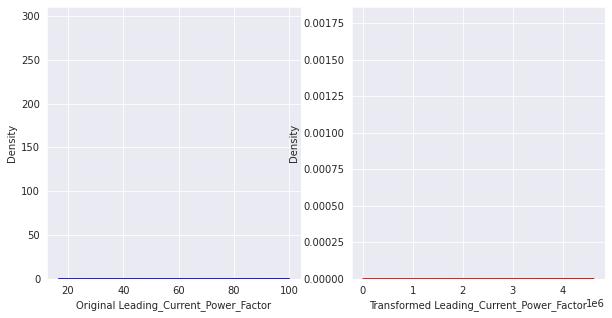


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'NSM' . Skewness = 0.06


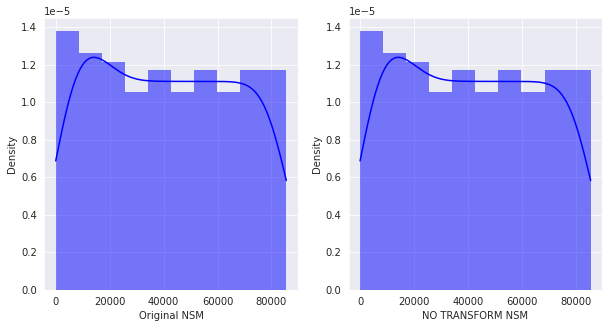

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X = skew_autotransform(X.copy(deep=True), plot = True, exp = False, threshold = 1)

#**Pre-processing-Outliers**

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.
from scipy.stats.mstats import winsorize

cols = X.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X,i)
  print("Column ",i,": ",outliers_Tukey)
  
# Windsorize X and check the results
print("Before", X.describe())
X_winsorized = X.copy(deep=True)
for i in cols:
  X_winsorized[i] = winsorize(X[i], limits=(0.05, 0.05))
print("After", X_winsorized.describe())

Column  Lagging_Current_Reactive.Power_kVarh :  []
Column  Leading_Current_Reactive_Power_kVarh :  []
Column  CO2(tCO2) :  []
Column  Lagging_Current_Power_Factor :  []
Column  Leading_Current_Power_Factor :  [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 134, 144, 145, 146, 147, 148, 171, 173, 176, 177, 178, 179, 180, 181, 182, 183, 184, 240, 241, 242, 243, 244, 263, 266, 268, 271, 273, 274, 275, 276, 277, 278, 279, 280, 336, 337, 338, 339, 358, 359, 371, 372, 373, 374, 375, 376, 432, 433, 434, 435, 436, 454, 455, 466, 467, 468, 469, 470, 471, 472]
Column  NSM :  []
Before        Lagging_Current_Reactive.Power_kVarh  \
count                            500.000000   
mean                               2.178753   
std                                2.920032   
min                               -2.804131   
25%       

In [49]:
# Update result df with winzorized quant features

def windorized(self):
  for ls in self:
    df[ls]=X_winsorized[ls]

lists = ['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']

windorized(lists)

In [ ]:
#Review columns
df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Friday',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Load_Type_Light_Load',
       'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'],
      dtype='object')

# **Model Building** 

In [ ]:
# Split Predictors & Target
X = pd.DataFrame(df.drop(['Usage_kWh'],axis=1))
y = pd.DataFrame(df['Usage_kWh']) 

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
# print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape) 


In [ ]:
stdsc1 = StandardScaler()  
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()  
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

In [ ]:
X_train_std=pd.DataFrame(X_train_std)
X_train_std.columns=X.columns

In [ ]:
# Gridsearch a RandomForestRegressorRegressor some of the hyperparameter space
model = RandomForestRegressor(criterion='squared_error',random_state=1221)    
# define the grid of values to search
grid = dict()
grid['max_leaf_nodes']= [100, 200]
grid['max_depth']= [5, 7, 9]
grid['n_estimators'] = [400, 1000]
cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=192837465)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_std, y_train_std)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Fit RandomForestRegressor on holdout sample
#regr = RandomForestRegressor(criterion ='squared_error',max_leaf_nodes=200,max_depth=9,n_estimators=400,random_state=1221)
regr = RandomForestRegressor(criterion='squared_error',random_state=1221, max_depth=9, max_leaf_nodes=200, n_estimators= 400)
regr.fit(X_train_std, np.ravel(y_train_std))
# Make predictions 
y_pred_train_std = regr.predict(X_train_std)
y_pred_std = regr.predict(X_test_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = stdsc2.inverse_transform(y_pred_std)
y_pred_train_std = pd.DataFrame(y_pred_train_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = pd.DataFrame(y_pred)

In [ ]:
# record feature labels
Xcols = X.columns

#**M6 Hackathon Starts Here**
You have EDA, data preprocessing, and model. The ball is now in your court. Your objective is to interpret and explain the model performance using XAI methods. Good luck!

#**Feature Importance with RandomForestRegressor Model [Global Method]**

In [ ]:
# Feature Importance using the builtin in RandomForestRegressor (based upon impurity analysis)
RF_feature_importances = pd.Series(regr.feature_importances_, index=Xcols)
RF_feature_importances.nlargest(10).plot(kind='barh')

#**Shapey Values with RandomForestRegressor Model [Global & Local Method]**

  0%|          | 0/400 [00:00<?, ?it/s]

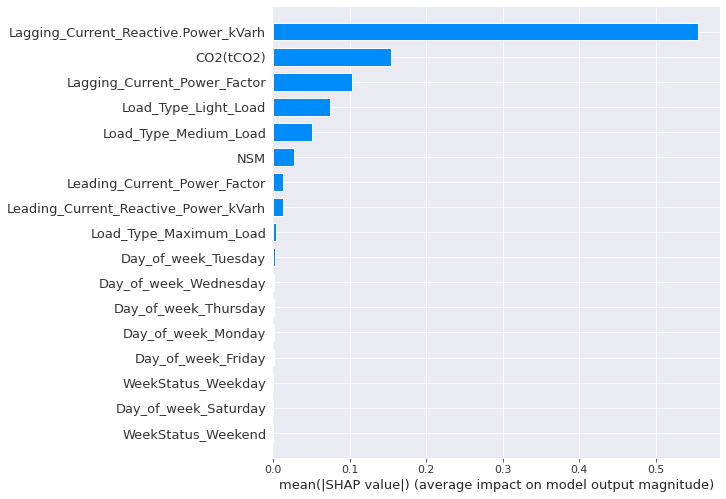

In [ ]:
# Global (i.e., model-level) Shapley values
# explainer = shap.KernelExplainer(regr.predict, X_train_std)
explainer = shap.SamplingExplainer(regr.predict, X_train_std)
shap_values = explainer.shap_values(X_train_std)
shap.summary_plot(shap_values, X_train_std, plot_type='bar',feature_names=Xcols)

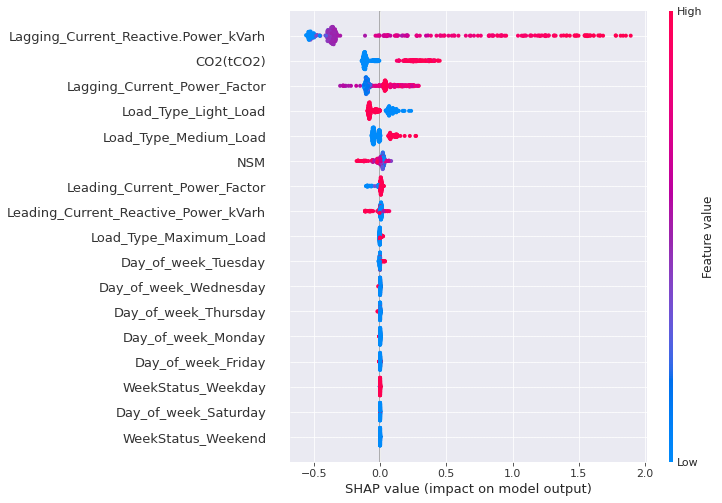

In [ ]:
# Check direction of impact (local Shapley values)
shap.summary_plot(shap_values, X_train_std,feature_names=Xcols)

#**Partial Dependence Plots with RandomForestRegressor Model [Global Method]** 

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


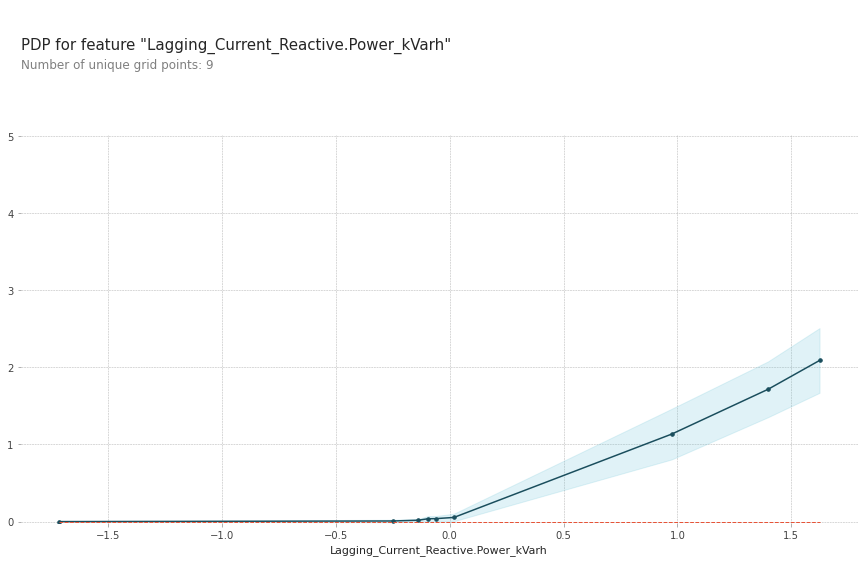

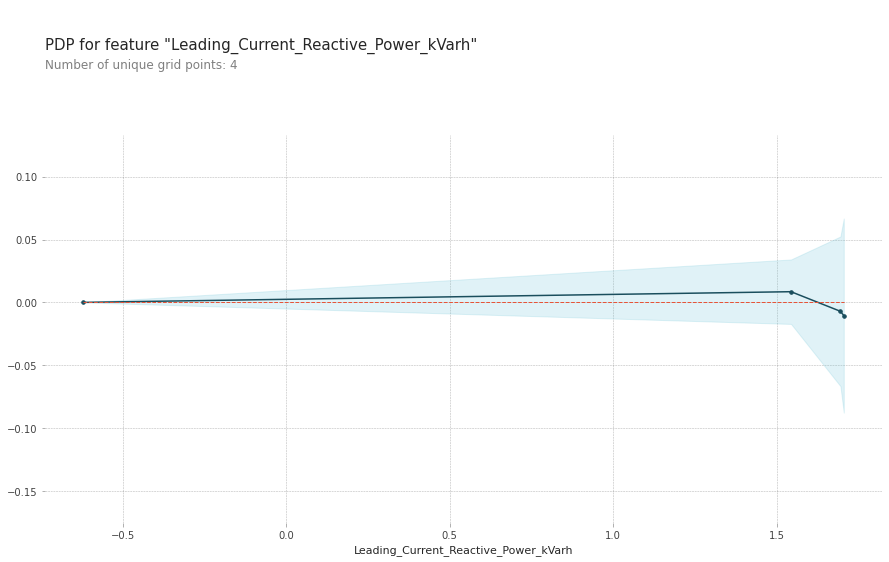

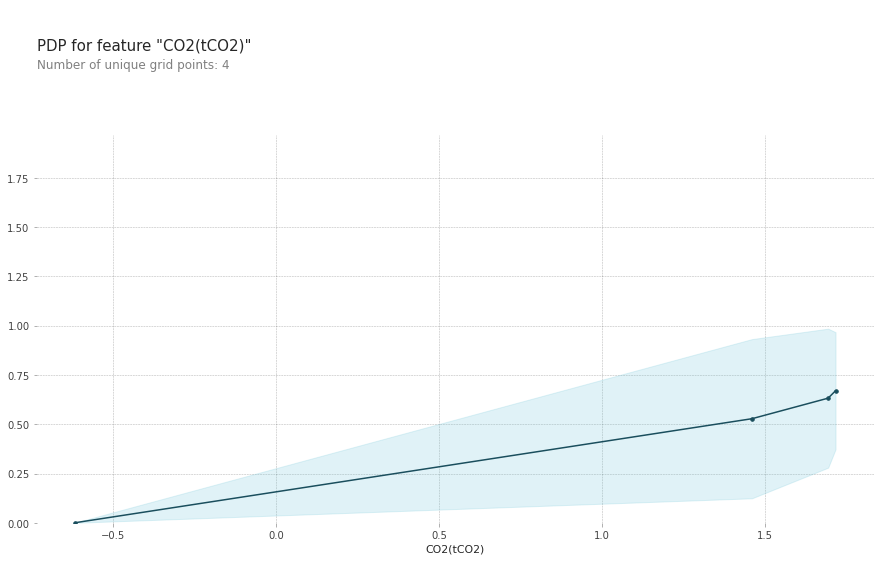

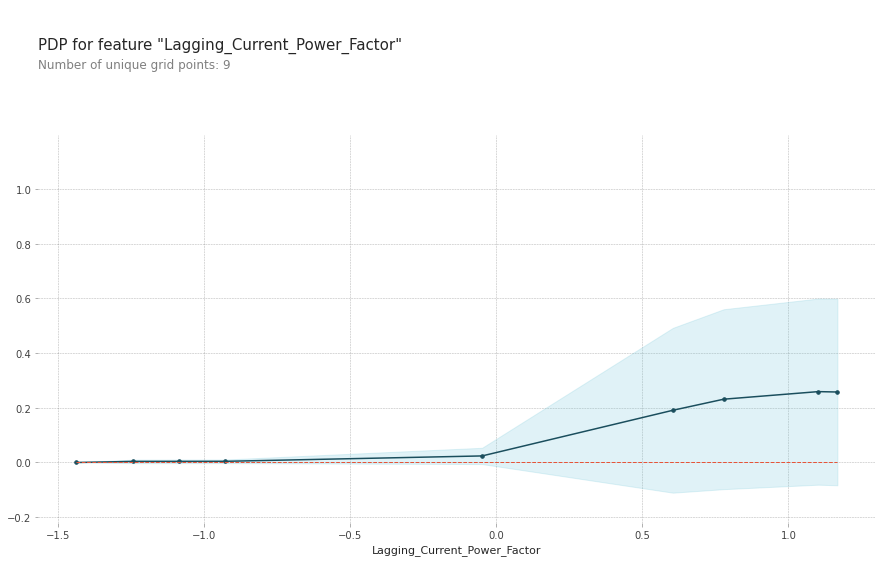

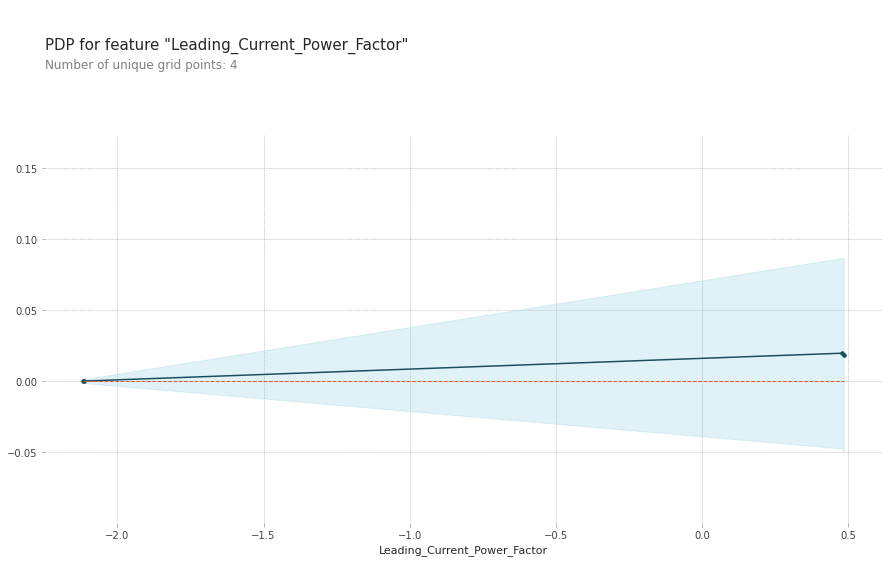

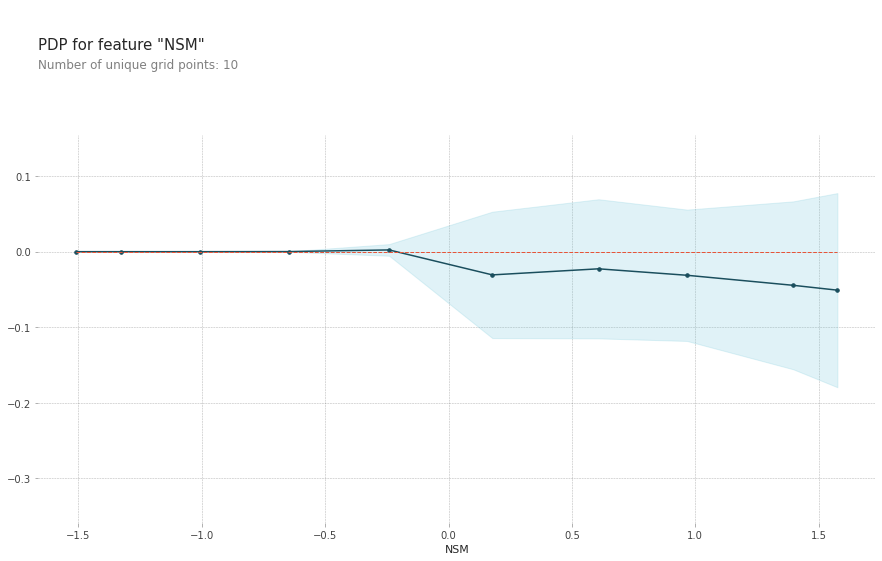

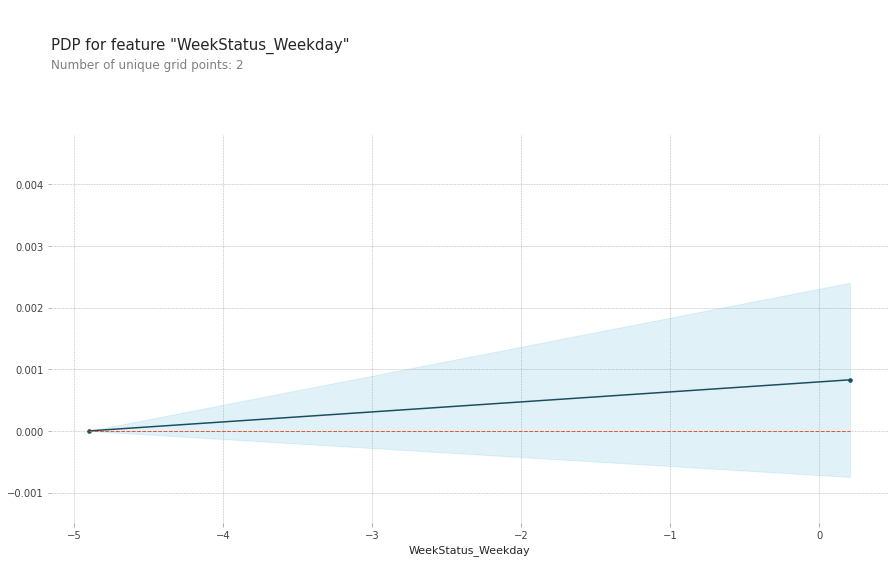

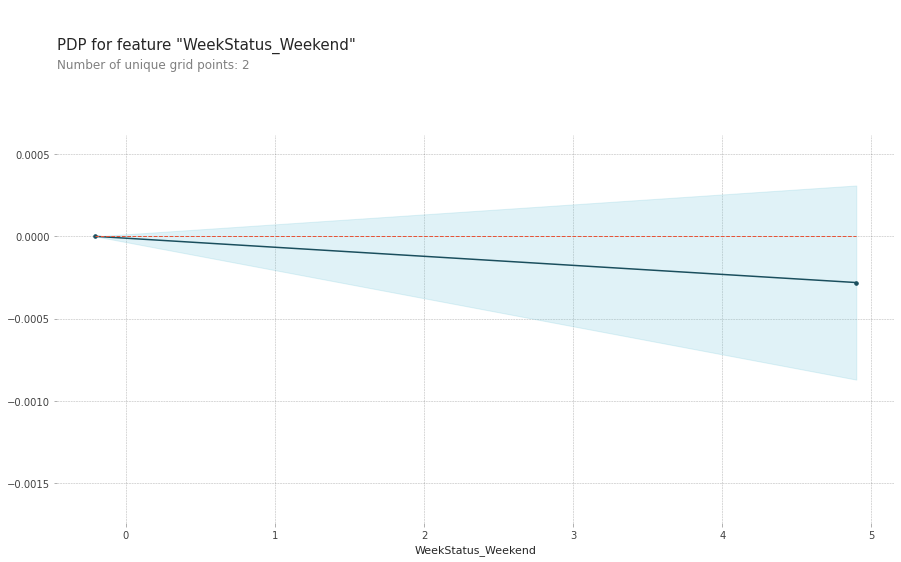

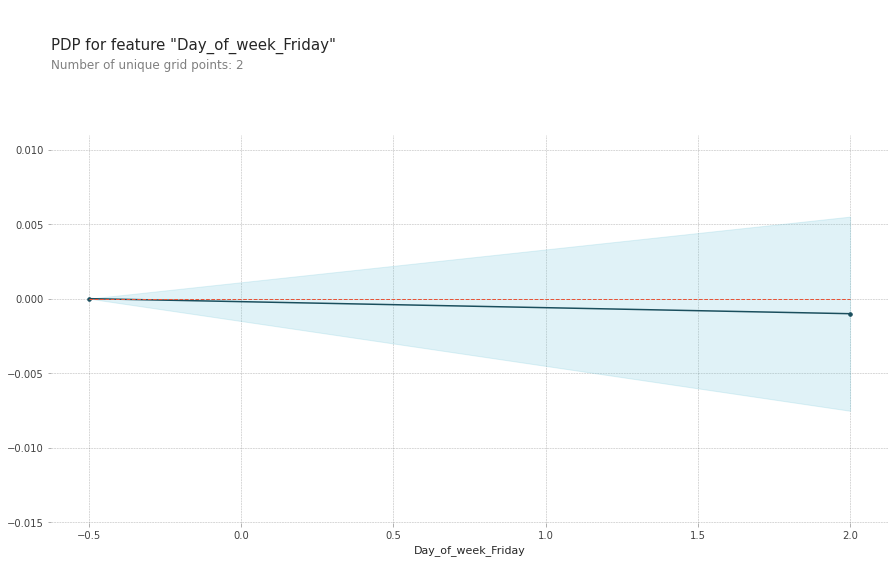

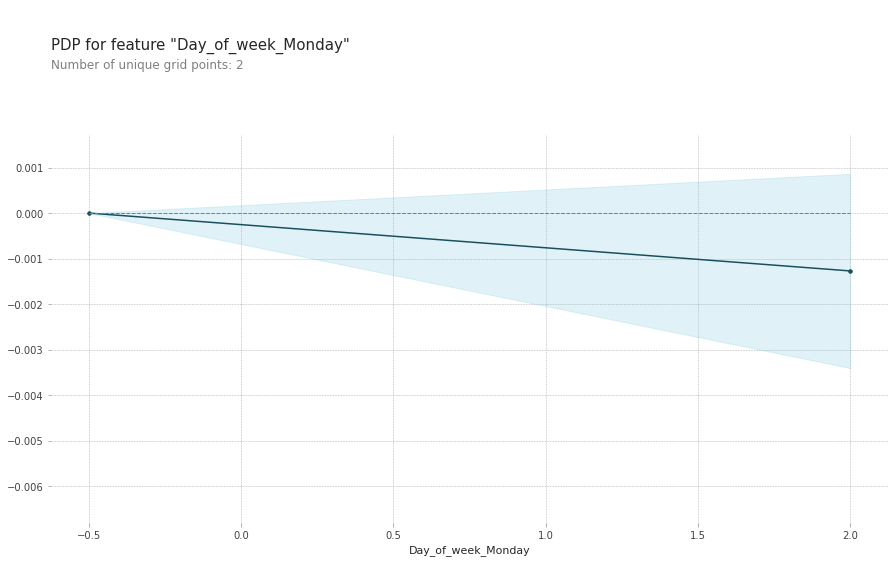

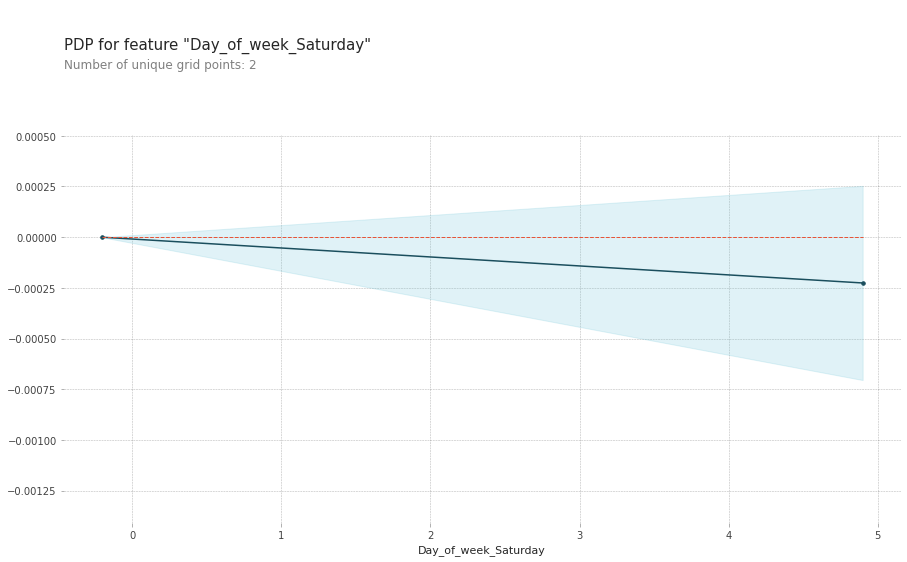

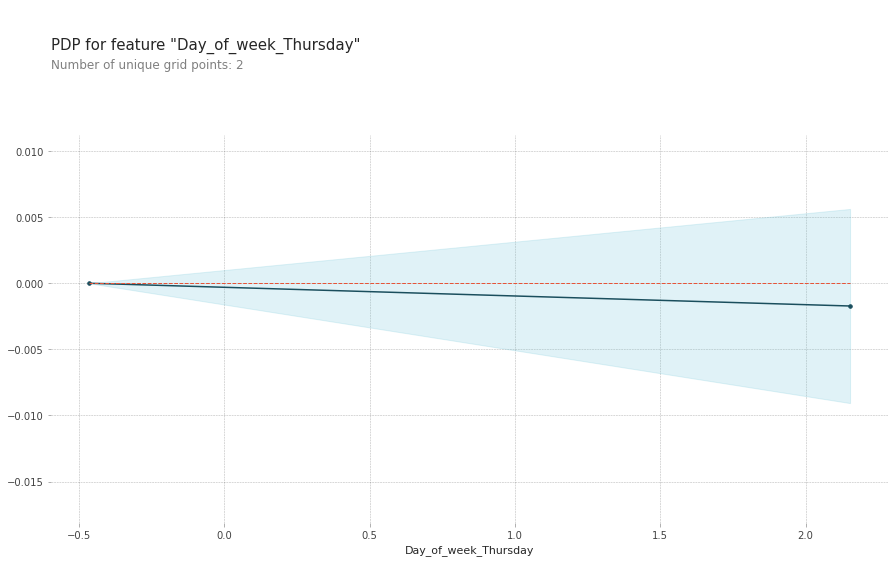

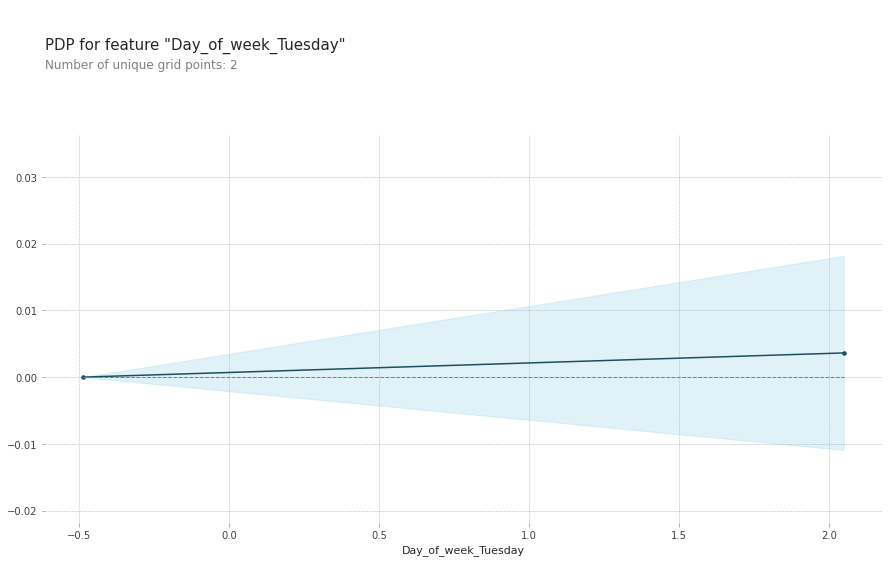

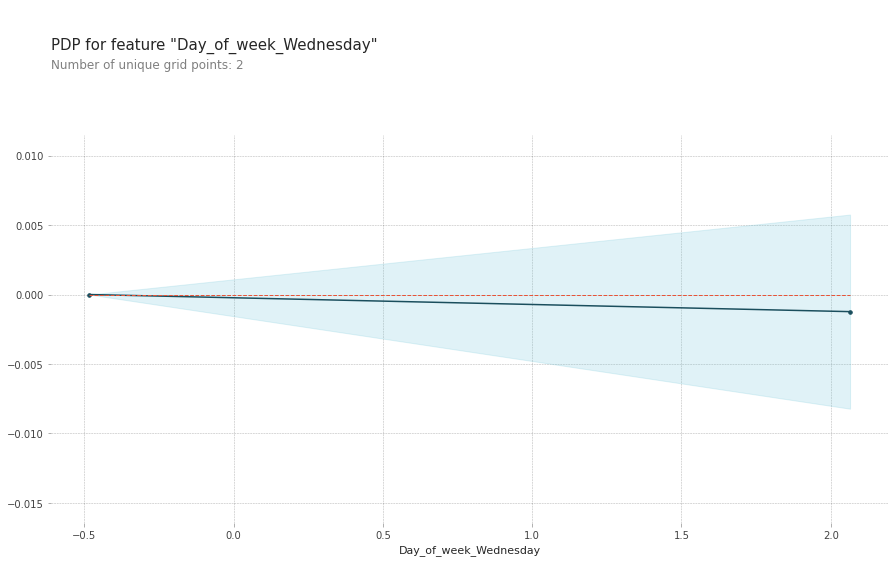

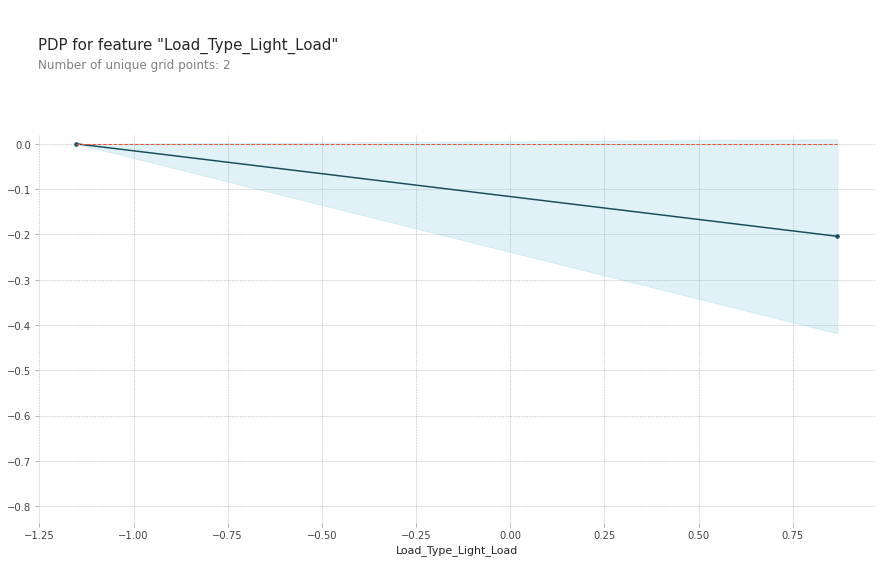

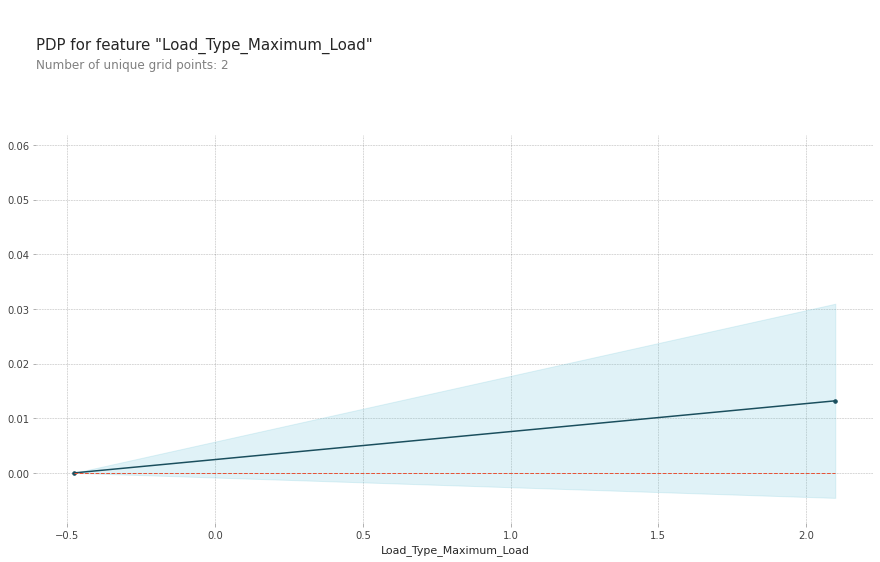

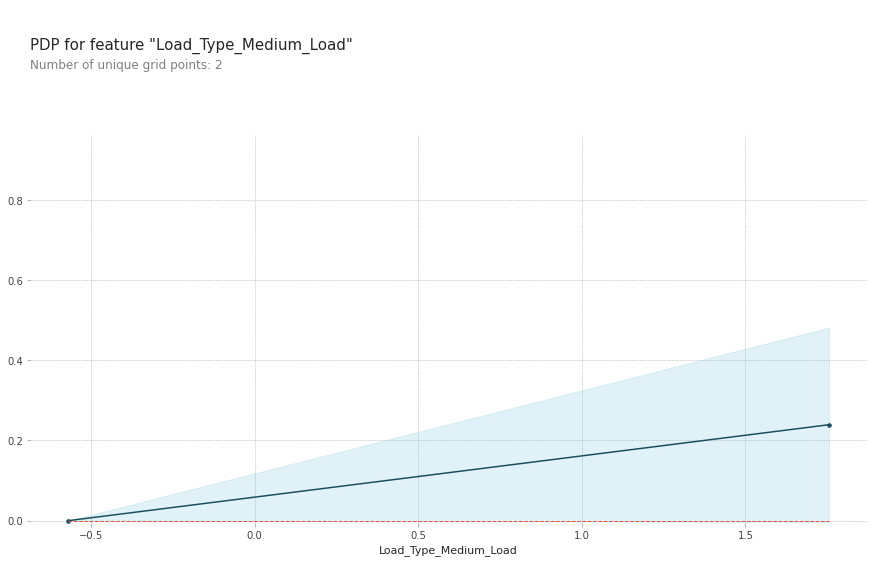

In [ ]:
# PDPs
for i in X.columns:    
    pdp_ = pdp.pdp_isolate(model = regr, dataset = X_train_std, model_features = X.columns, feature = i, n_jobs=1) 
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

Computing partial dependence and ICE plots...


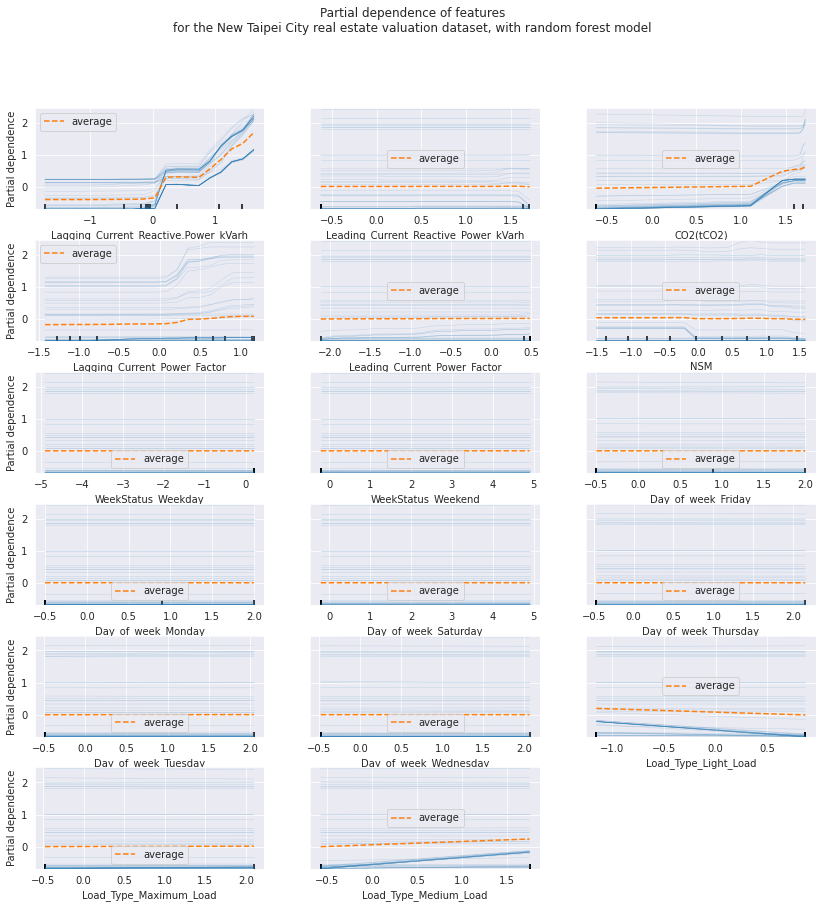

In [ ]:
# Creare PDP & ICE plots
print("Computing partial dependence and ICE plots...")
features = X.columns
fig, ax = plt.subplots(figsize=(14, 14))
display = PartialDependenceDisplay.from_estimator(
    regr,
    X_train_std,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"}, ax=ax
)
display.figure_.suptitle(
    "Partial dependence of features\n"
    "for the New Taipei City real estate valuation dataset, with random forest model"
)
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
# Review mean and standard deviation of X3_MRT feature
df.describe(include = ['float64'])

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,35.216060,2.162288,-11.425658,-1738.315417,83.982940,3.765313e+06
std,44.808769,2.892626,7.651925,1002.737754,13.933727,1.768240e+06
min,3.170000,-2.804131,-16.154544,-2377.236016,63.600000,1.146270e+04
25%,4.140000,1.473662,-16.154544,-2377.236016,69.097500,4.618420e+06
50%,4.680000,1.887430,-16.154544,-2377.236016,90.645000,4.620088e+06
75%,65.132500,4.525397,-0.853756,-322.172639,97.027500,4.620088e+06
max,147.460000,6.755088,1.670611,-68.616519,100.000000,4.620088e+06


#**LIME on RandomForestRegressor Model [Local Method]**



In [ ]:
# LIME 
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_std.values, feature_names=X.columns, class_names=['Y_Price'], categorical_features=[], verbose=True, mode='regression')
i = 25   # Examining instance 25
exp = explainer.explain_instance(X_train_std.loc[i], regr.predict, num_features=7)
exp.show_in_notebook(show_table=True)
print(f"The instance {i} standardized actual target value is {y_train_std[i]} and is predicted (on the standardized scale) by the RandomForestRegressor to be {y_pred_std.loc[i]}")

Intercept -0.15108505135936245
Prediction_local [1.39368462]
Right: 0.9202431655964841


The instance 25 standardized actual target value is [0.89636414] and is predicted (on the standardized scale) by the RandomForestRegressor to be 0    1.674678
Name: 25, dtype: float64


In [ ]:
exp.as_list()

[('Lagging_Current_Reactive.Power_kVarh > 0.75', 1.3332156109663063),
 ('CO2(tCO2) > 1.46', 0.5049392003408981),
 ('Load_Type_Medium_Load <= -0.57', -0.17220390307907818),
 ('-1.07 < Lagging_Current_Power_Factor <= 0.45', -0.1543302755392912),
 ('Load_Type_Maximum_Load > -0.48', 0.040274190260609286),
 ('Day_of_week_Friday <= -0.50', -0.03276071291249319),
 ('WeekStatus_Weekend <= -0.20', 0.025635558848187245)]

#**Surrogate Models for RandomForestRegressor Model [Local & Global Method]**

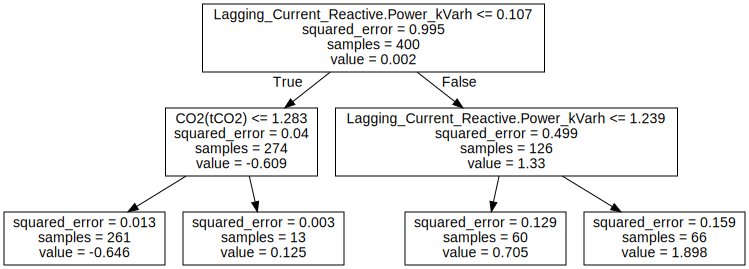

In [ ]:
# Decision Tree surrogate for RandomForestRegressor model
from sklearn.tree import DecisionTreeRegressor
import graphviz

proxy = DecisionTreeRegressor(random_state = 20850,max_depth=2)    # Control the depth of the surrogate model tree here
proxy.fit(X_train_std,y_pred_train_std)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = Xcols)
graphviz.Source(tree_graph)

In [ ]:
# Multiple Linear Regression surrogate model (for RandomForesRegerssor model)
import statsmodels.api as sm
model = sm.OLS(y_pred_train_std, X_train_std).fit()
predictions = model.predict(X_train_std) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              415.9
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                   3.91e-218
Time:                        21:19:35   Log-Likelihood:                         -25.468
No. Observations:                 400   AIC:                                      76.94
Df Residuals:                     387   BIC:                                      128.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

#**XGBRegressor Model**

In [ ]:
# Gridsearch an XGBoostRegressor hyperparameter space
model = XGBRegressor(objective ='reg:squarederror')    
# define the grid of values to search
grid = dict()
grid['learning_rate']= [.05, 0.07]
grid['max_depth']= [7, 9]
grid['n_estimators'] = [400]
cv = RepeatedKFold(n_splits=4, n_repeats=2, random_state=192837465)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_std, y_train_std)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.016341 using {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400}
-0.016341 (0.005379) with: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400}
-0.016596 (0.005742) with: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 400}
-0.016708 (0.005419) with: {'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 400}
-0.016783 (0.005661) with: {'learning_rate': 0.07, 'max_depth': 9, 'n_estimators': 400}


In [ ]:
# Fit XGBRegressor on holdout sample
regr = XGBRegressor(objective ='reg:squarederror',learning_rate=0.07,max_depth=7,n_estimators=400)
regr.fit(X_train_std, np.ravel(y_train_std))
# Make predictions 
y_pred_train_std = regr.predict(X_train_std)
y_pred_std = regr.predict(X_test_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = stdsc2.inverse_transform(y_pred_std)
y_pred_train_std = pd.DataFrame(y_pred_train_std)
y_pred_std = pd.DataFrame(y_pred_std)
y_pred = pd.DataFrame(y_pred)

ValueError: ignored

#**Feature Importance with XGBRegressor Model [Global Method]**

In [ ]:
XGB_feature_importances = pd.Series(regr.feature_importances_, index=Xcols)
XGB_feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
# Global (i.e., model-level) Shapley values
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_train_std)
shap.summary_plot(shap_values, X_train_std, plot_type='bar',feature_names=Xcols)

In [ ]:
# Check direction of impact (local Shapley values)
shap.summary_plot(shap_values, X_train_std,feature_names=Xcols)

#**Partial Dependence Plots with XGBRegressor Model [Global Method]** 

In [ ]:
# PDPs
for i in X.columns:    
    pdp_ = pdp.pdp_isolate(model = regr, dataset = X_train_std, model_features = X.columns, feature = i, n_jobs=1) 
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

In [ ]:
# Descriptive statistics
df.describe()

#**Surrogate Models for XGBregressor Model [Local & Global Method]**

In [ ]:
# Decision Tree surrogate for XGBRegressor model
proxy = DecisionTreeRegressor(random_state = 20850,max_depth=4)    # Control the depth of the surrogate model tree here
proxy.fit(X_train_std,y_pred_train_std)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = Xcols)
graphviz.Source(tree_graph)

In [ ]:
# Multiple Linear Regression model (for XGBRegressor moel)
import statsmodels.api as sm
model = sm.OLS(y_pred_train_std, X_train_std).fit()
predictions = model.predict(X_train_std) 
 
print_model = model.summary()
print(print_model)

# **Conclusions from the Preprocessing & Classification Notebooks Data Preprocessing**
There are no missing value or duplicates needed to handle with. Skewness has been correceted and data has been winsorized to preserve. Sample are not enough to do undersample. It was supposed to use SMOTE to do oversampling. Skewness correction do not have much effect on dataset. We use Turkey's rule to eliminate the outliers

#**Conclusion:**

# Random Forest Regressor:

1.Lagging_Current_reactive_power_kVarh is the most important feature in the feature importance analysis with Random Forest Regressor. Other features show less influence on the predictor variable.

2.In shapley value analysis, Lagging_Current_reactive_power_kVarh, CO2(tCO2) and Lagging_Current_Power_Factor are the top 3 factors that show importance to our model. We can add CO2(tCO2) and Lagging_Current_Power_Factor to important features with greater impact on model. 

3.Based on partial Dependence Plots, Lagging_Current_reactive_power_kVarh is increasing above the value 0. The feature works for instances above the mean value(2.162288).

4.Using Surrogate Model, Lagging_Current_reactive_power_kVarh and CO2(tCO2) are important branches to influence the model. For the regression model, the R-square value is 0.933, which has good model performance.

# XGBoost Regressor Model:

1.In feature importance analysis, Lagging_Current_reactive_power_kVarh is still the most important feature.

2.Using Surrogate Model, Lagging_Current_reactive_power_kVarh, CO2(tCO2) and Lagging_Current_Power_Factor are three important branches in the decision tree model. 